# IN3050/IN4050 2021: Week 06 Perceptron
### Introduction
The goal of this week is to get familiar with the perceptron classifier.
We will first consider some "paper-and-pencil" exercises to familiarize ourselves with the algorithm, before we consider an implementation.

## Part 1: Paper and Pencil

### Exercise I
You want to predict if movies will be profitable based on their screenplays. You hire two critics A and B to read a script you have and rate it on a scale of 1 to 6. The critics are not perfect; here are five data points including the critics' scores and the performance of the movie:
```
| Movie # | Alice    | Bob       | Profitable? |
|  _______|__________|___________|_____________|
|  1      | 1        | 1         |      no     |
|  _______|__________|___________|_____________|
|  2      | 4        | 3         |      yes    |
|  _______|__________|___________|_____________|
|  3      | 3        | 5         |      yes    |
|  _______|__________|___________|_____________|
|  4      | 5        | 6         |      yes    |
|  _______|__________|___________|_____________|
|  5      | 2        | 3         |      no     |
|  _______|__________|___________|_____________|
```
Is the data linearily separable? Plot the data on a sheet of paper; label profitable movies with + and non-profitable movies with x and determine if the data are linearily separable.

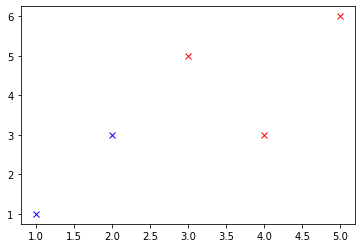

In [1]:
import matplotlib.pyplot as plt

X = [1,4,3,5,2]
Y = [1,3,5,6,3]
p = [0,1,1,1,0]

for i in range(len(X)):
    if p[i] == 1:
        plt.plot(X[i], Y[i], "x", color="red")
    else:
        plt.plot(X[i], Y[i], "x", color="blue")

plt.show()

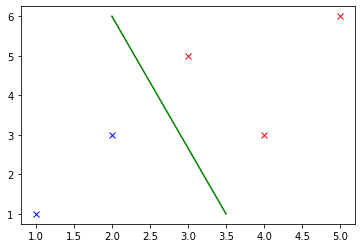

In [2]:
for i in range(len(X)):
    if p[i] == 1:
        plt.plot(X[i], Y[i], "x", color="red")
    else:
        plt.plot(X[i], Y[i], "x", color="blue")
    
plt.plot((2,3.5), (6, 1), color="green")
plt.show()

### Exercise II

Now you decide to use a perceptron to classify your data. Suppose you directly use the scores given above as features, together with a bias feature. That is $f_0=1$, $f_1=$ score given by A and $f_2=$ score given by B.

Run one pass through the data with the perceptron algorithm, filling out the table below. Go through the data points in order, e.g., using data point 0 at step 1. For each of the 5 steps write the current state of the weights, the score, and whether the prediction is correct.

```
| Step | Weights    | Score                   | Correct predicition? |
_______|____________|_________________________|______________________|
|  1   | (-1, 0, 0) | -1*1 + 0*1 + 0 * 1 = -1 |      yes             |
_______|____________|_________________________|______________________|
|  2   |            |                         |                      |
_______|____________|_________________________|______________________|
|  3   |            |                         |                      |
_______|____________|_________________________|______________________|
|  4   |            |                         |                      |
_______|____________|_________________________|______________________|
|  5   |            |                         |                      |
_______|____________|_________________________|______________________|

```

In [3]:
print("""
Assume learning rate = nu = 1

| Step | Weights    | Score                 | Correct predicition? |
_______|____________|_______________________|______________________|
|  1   | (-1, 0, 0) | 1*-1 + 0*1 + 0*1 = -1 |      yes             | Update: prediction correct, nothing happens
_______|____________|_______________________|______________________|
|  2   | (-1, 0, 0) | 1*-1 + 4*0 + 3*0 = -1 |      no              | Update: prediction wrong, add (- nu*(0-1)*x) = (1,4,3) to weights
_______|____________|_______________________|______________________|
|  3   | ( 0, 4, 3) |  1*0 + 3*4 + 5*3 = 27 |      yes             | Update: prediction correct, nothing happens
_______|____________|__ ____________________|______________________|
|  4   | ( 0, 4, 3) |  1*0 + 5*4 + 6*3 = 38 |      yes             | Update: prediction correct, nothing happens
_______|____________|_______________________|______________________|
|  5   | ( 0, 4, 3) |  1*0 + 2*4 + 3*3 = 17 |      no              | Update: prediction wrong, add (- nu*(1-0)*x) = (-1,-2,-3) to weights
_______|____________|_______________________|______________________|

final weights = (-1,2,0)
""")


Assume learning rate = nu = 1

| Step | Weights    | Score                 | Correct predicition? |
_______|____________|_______________________|______________________|
|  1   | (-1, 0, 0) | -1*1 + 0*1 + 0*1 = -1 |      yes             | Update: prediction correct, nothing happens
_______|____________|_______________________|______________________|
|  2   | (-1, 0, 0) | -1*1 + 4*0 + 3*0 = -1 |      no              | Update: prediction wrong, add (- nu*(0-1)*x) = (1,4,3) to weights
_______|____________|_______________________|______________________|
|  3   | ( 0, 4, 3) |  3*0 + 3*4 + 5*3 = 27 |      yes             | Update: prediction correct, nothing happens
_______|____________|_______________________|______________________|
|  4   | ( 0, 4, 3) |  3*0 + 5*4 + 6*3 = 38 |      yes             | Update: prediction correct, nothing happens
_______|____________|_______________________|______________________|
|  5   | ( 0, 4, 3) |  3*0 + 2*4 + 3*3 = 17 |      no              | Update: pre

### Exercise III
 Have weights been learned that separate the data?

### Exercise IV
More generally, irrespective of the training data, you want to know if your features are powerful enough to allow you to handle a range of scenarios. Which of the following scenarios can a perceptron using the features above  indeed perfectly classify movies which are profitable according to the given rules:

1. Your reviewers are awesome: if the total of their scores is more than 8, then the movie will definitely be profitable, and otherwise it won't be.

2. Your reviewers are art critics. Your movie will be profitable if and only if each reviewer gives either a score of 3 or a score of 4.

3. Your reviewers have weird but different tastes. Your movie will be profitable if and only if both reviewers agree.

## Part 2: Implementing the Perceptron Classifier

### Exercise V
We will use the same framework as for the *k*NN-classifier. You should implement the two methods `fit` and `predict`. You don't need a `__init__` method. You may include other methods if you find it convenient.

The main part of the perceptron classifier is the `fit` method that trains the perceptron.
`eta` is the learning rate
One `epoch` is a run through all the training data.
We have set the default to one epoch, but you might need more.
Remember to add the bias to the data.

In [4]:
class PyClassifier():
    """Common methods to all python classifiers --- if any
    
    Nothing here yet"""

In [5]:
def funkyfunc():
    pass
    # literally does nothing

class PyPerClassifier(PyClassifier):
    """Simple perceptron python classifier"""

    def forward(self, x):
        return sum([w * x_element for w, x_element in zip(self.weights, x)])
    
    def fit(self, X_train, y_train, eta=1, epochs=1):
        """Train the self.weights on the training data with learning
        rate eta, running epochs many epochs"""
        funkyfunc()
        initial_weight = 0
        self.dim = len(X_train[0]) + 1 # Includes bias in the dimensionality
        self.decision_boundary = 0

        X_train = [[1] + list(x) for x in X_train] # Inserts bias at the start of each point
        self.weights = [initial_weight for _ in range(self.dim)]
#         self.weights = [0]*self.dim

        for e in range(epochs):
            for x, t in zip(X_train, y_train):
                y = int(self.forward(x) > self.decision_boundary) # Decision boundary is 0, due to bias existing
                for i in range(self.dim):
                    self.weights[i] -= eta * (y-t) * x[i]
        
    def predict(self, x):
        """Predict the value for the item x"""
        score = self.forward([1] + list(x))
        return int(score > self.decision_boundary)

    def accuracy(self, X_test, y_test):
        predictions = [self.predict(x) for x in X_test]
        total_score = sum([(pred == true) for (pred, true) in zip(predictions, y_test)])
        return total_score/len(y_test)
        

## Dataset
We will train and test the classifier on the same sythetic dataset as we used for the *k*NN last week.

In [6]:
from sklearn.datasets import make_blobs
X_np, y_np = make_blobs(n_samples=200, centers=[[0,0],[1,2]], 
                  n_features=2, random_state=2019)
X1 = [(X_np[i,0], X_np[i,1]) for i in range(X_np.shape[0])]
y1 = [y_np[i] for i in range(X_np.shape[0])]

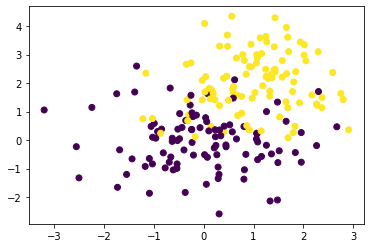

In [7]:
plt.scatter(X_np[:, 0], X_np[:, 1], c=y_np)
plt.show()

In [8]:
X_np, y_np = make_blobs(n_samples=200, centers=[[0,0],[1,2]], 
                  n_features=2, random_state=2020)
X2 = [(X_np[i,0], X_np[i,1]) for i in range(X_np.shape[0])]
y2 = [y_np[i] for i in range(X_np.shape[0])]

In [9]:
eta = 0.1

for epoch_n in range(1,20):
    classifier = PyPerClassifier()
    classifier.fit(X1, y1, eta=eta, epochs=epoch_n)
    score = classifier.accuracy(X2, y2)

    print(f"Accuracy after {epoch_n} epochs: {score}")

Accuracy after 1 epochs: 0.835
Accuracy after 2 epochs: 0.84
Accuracy after 3 epochs: 0.815
Accuracy after 4 epochs: 0.835
Accuracy after 5 epochs: 0.835
Accuracy after 6 epochs: 0.815
Accuracy after 7 epochs: 0.825
Accuracy after 8 epochs: 0.825
Accuracy after 9 epochs: 0.825
Accuracy after 10 epochs: 0.825
Accuracy after 11 epochs: 0.825
Accuracy after 12 epochs: 0.82
Accuracy after 13 epochs: 0.83
Accuracy after 14 epochs: 0.825
Accuracy after 15 epochs: 0.82
Accuracy after 16 epochs: 0.82
Accuracy after 17 epochs: 0.815
Accuracy after 18 epochs: 0.825
Accuracy after 19 epochs: 0.805


### Exercise VI
Train PyPerClassifier_on1  X1, y1 and test on X2, y2 as with the *k*NN-classifier. Try various numbers of epochs and see whether it makes a difference.

Is X2, y2 linearly separable?

### Exercise VII: Termination and Weights
- Extend the *PyPerClassifier()* with a method such that we can inspect the weights after training  is completed.
- Modify the *fit*-method of the classifier such that training halts when there are no more updates, and it is possible to inspect how many epochs it took.
- Run this on the five points film critics dataset. How many epochs does it take to reach completion?
- What are the final weights? Can you plot the decision border that corresponds to these weights together with the data set?

Accuracy after 1 epochs: 0.835 | weights: (-2.0000000000000003e-06, 6.929357417346002e-07, 3.7573891723636125e-06)


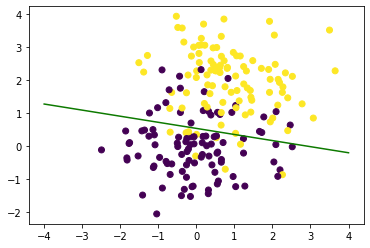

TypeError: list indices must be integers or slices, not tuple

In [10]:
class PyPerClassifierWithInspection(PyPerClassifier):
    def get_weights(self):
        return self.weights

    def get_boundary(self):
        return self.decision_boundary

import matplotlib as mpl
def colorFader(mix=0): # I stole this wholesale from StackOverflow: https://stackoverflow.com/questions/25668828/how-to-create-colour-gradient-in-python
    c1=np.array(mpl.colors.to_rgb("green")) # blue
    c2=np.array(mpl.colors.to_rgb('red')) # green
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

plt.scatter(X_np[:, 0], X_np[:, 1], c=y_np)

import numpy as np
x = np.linspace(-4, 4)
        
eta = 1e-6
epoch_max = 20

for epoch_n in range(1,epoch_max):
    classifier = PyPerClassifierWithInspection()
    classifier.fit(X1, y1, eta=eta, epochs=epoch_n)
    score = classifier.accuracy(X2, y2)
    bias, w0, w1 = classifier.get_weights()
    boundary = classifier.get_boundary()

    print(f"Accuracy after {epoch_n} epochs: {score} | weights: {(bias, w0, w1)}")

    plt.plot(x, (boundary - bias - x*w0)/w1, color=colorFader(epoch_n/epoch_max))
    plt.show()
    plt.scatter(X1[:, 0], X1[:, 1], c=y_np)
    plt.plot(x, (boundary - bias - x*w0)/w1, color=colorFader(epoch_n/epoch_max))
    plt.show()